In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ecific predictor variables tested are: rating, genre, budget, runtime, binned_director, binned_writer, binned_star, binned_company, is_remake, is_sequel. 

In [2]:
GDRIVE_BASE = 'https://drive.google.com/uc?id='
reboot = "https://drive.google.com/file/d/1YOBBHFKZEzmQvMBYkal9VBYcZcSbA9rn/view?usp=sharing"
remake = "https://drive.google.com/file/d/1I8iew5nQk-xKfAtLhjcMOuXMZuzk1_vv/view?usp=share_link"
sequel = "https://drive.google.com/file/d/1t_FE5rfGKxKfENHk2DhUq5son65nY2vy/view?usp=sharing"
inflation = "https://drive.google.com/file/d/1nckwEDwW8Q9lFBZMV7gPEvfbf_9ovckt/view?usp=sharing"

reboot = GDRIVE_BASE + reboot.split('/')[-2]
remake = GDRIVE_BASE + remake.split('/')[-2]
sequel = GDRIVE_BASE + sequel.split('/')[-2]
inflation = GDRIVE_BASE + inflation.split('/')[-2]

remake = pd.read_csv(remake, encoding = 'latin-1')
reboot = pd.read_csv(reboot, encoding = 'latin-1')
sequel = pd.read_csv(sequel)
inflation = pd.read_csv(inflation)
imdb = pd.read_csv("movies.csv")
imdb = imdb[imdb.country.isin(['United States', 'United Kingdom', 'Australia', 'Canada'])]

In [3]:
imdb

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [4]:
remake

,Original,Remake(s),Notes
0,13 Assassins (1963),13 Assassins (2010),NaN
1,13 Ghosts (1960),Thirteen Ghosts (2001),NaN
2,13 Tzameti (2005),13 (2010),NaN
3,3 Idiots (2009),Nanban (2012) 3 Idiotas (2017),NaN
4,3:10 to Yuma (1957),3:10 to Yuma (2007),NaN
...,...,...,...
333,My Little Pony: The Movie (1986),My Little Pony: The Movie (2017),NaN
334,My Man Godfrey (1936),My Man Godfrey (1957),NaN
335,My Name Is Julia Ross (1945),Dead of Winter (1987),NaN
336,My Sister Eileen (1942),My Sister Eileen (1955),This also spawned a brief TV series from 1961-...


In [5]:
reboot.style

,Reboot,href
0,Reboot (fiction),/wiki/Reboot_(fiction)
1,Alex Cross (film),/wiki/Alex_Cross_(film)
2,The Amazing Spider-Man (film),/wiki/The_Amazing_Spider-Man_(film)
3,The Batman (film),/wiki/The_Batman_(film)
4,Batman Begins,/wiki/Batman_Begins
5,Beethoven's Big Break,/wiki/Beethoven%27s_Big_Break
6,Benji (2018 film),/wiki/Benji_(2018_film)
7,Billa (2007 film),/wiki/Billa_(2007_film)
8,Billa (2009 film),/wiki/Billa_(2009_film)
9,Blue Lagoon: The Awakening,/wiki/Blue_Lagoon:_The_Awakening


In [6]:
imdb[imdb['name'].str.contains(r'\(.*')].style

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
71,"Bon Voyage, Charlie Brown (and Don't Come Back!!)",G,Animation,1980,"May 30, 1980 (United States)",7.300000,2900.000000,Bill Melendez,Charles M. Schulz,Scott Beach,United States,nan,2013193.000000,Lee Mendelson Film Productions,75.000000
72,In God We Trust (or Gimme That Prime Time Religion),PG,Comedy,1980,"September 26, 1980 (United States)",5.500000,965.000000,Marty Feldman,Marty Feldman,Marty Feldman,United States,nan,5215015.000000,Universal Pictures,97.000000
6466,Birdman or (The Unexpected Virtue of Ignorance),R,Comedy,2014,"November 14, 2014 (United States)",7.700000,594000.000000,Alejandro G. Iñárritu,Alejandro G. Iñárritu,Michael Keaton,United States,18000000.000000,103215094.000000,New Regency Productions,119.000000


In [7]:
sequel

,name,is_sequel,has_sequel,desc,imdb_url,sequel_num,rating,genre.x,year,released,...,star,country,budget,gross,company,runtime,kaggle_num,type,genre.y,error
0,Spider-Man,0,1,After being bitten by a genetically-modified s...,https://www.imdb.com/title/tt0145487/,1,PG-13,Action,2002.0,"May 3, 2002 (United States)",...,Tobey Maguire,United States,139000000.0,825025036.0,Columbia Pictures,121.0,4044.0,NaN,NaN,NaN
1,Spider-Man 2,1,1,Peter Parker is beset with troubles in his fai...,https://www.imdb.com/title/tt0316654/,2,PG-13,Action,2004.0,"June 30, 2004 (United States)",...,Tobey Maguire,United States,200000000.0,788976453.0,Columbia Pictures,127.0,4460.0,NaN,NaN,NaN
2,Spider-Man 3,1,0,A strange black entity from another world bond...,https://www.imdb.com/title/tt0413300/,3,PG-13,Action,2007.0,"May 4, 2007 (United States)",...,Tobey Maguire,United States,258000000.0,894983373.0,Columbia Pictures,139.0,5058.0,NaN,NaN,NaN
3,The Matrix,0,1,When a beautiful stranger leads computer hacke...,https://www.imdb.com/title/tt0133093/,4,R,Action,1999.0,"March 31, 1999 (United States)",...,Keanu Reeves,United States,63000000.0,466364845.0,Warner Bros.,136.0,3444.0,NaN,NaN,NaN
4,The Matrix Reloaded,1,1,"Freedom fighters Neo, Trinity and Morpheus con...",https://www.imdb.com/title/tt0234215/,5,R,Action,2003.0,"May 15, 2003 (United States)",...,Keanu Reeves,United States,150000000.0,741847937.0,Warner Bros.,138.0,4257.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Sonic the Hedgehog,0,1,"After discovering a small, blue, fast hedgehog...",https://www.imdb.com/title/tt3794354/,1167,PG,Action,2020.0,"February 14, 2020 (United States)",...,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,7650.0,NaN,NaN,NaN
994,Sonic the Hedgehog 2,1,0,When the manic Dr Robotnik returns to Earth wi...,https://www.imdb.com/title/tt12412888/,1168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,405421518.0,NaN,NaN,NaN,NaN,"Action, Adventure, Comedy",NaN
995,That's Entertainment!,0,1,Various MGM stars from yesterday present their...,https://www.imdb.com/title/tt0072272/,1170,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26890200.0,NaN,NaN,NaN,NaN,"Documentary, Family, Musical",NaN
996,"That's Entertainment, Part II",1,1,"The second installment in the ""That's Entertai...",https://www.imdb.com/title/tt0075323/,1171,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4979380.0,NaN,NaN,NaN,NaN,"Documentary, Family, Musical",NaN


## Get `is_sequel` and `is_remake`

In [8]:
multiple_vals = []
def is_remake(name, year, case=True):
    remake_names = remake[remake['Remake(s)'].str.contains(name+" ", case=case, regex=False)]['Remake(s)'].values
    len_val = len(remake_names)
#     len_val = len(remake[remake['Remake(s)'].str.contains(name, case=False, regex=False)])
    if len_val == 1:
#         print(name,"\t\t\t", remake_names[0])#     print(len_val)
        
        years = re.findall('\((.*?)\)',remake_names[0])
        remake_years = [int(y) for y in years if y.isnumeric()]
        # check year
        if year in remake_years:
            print(name,"\t\t\t", remake_names[0]) #     print(len_val)
            return True
    if len_val > 1:
        for remake_name in remake_names:
            years = re.findall('\((.*?)\)',remake_name)

            remake_years = [int(y) for y in years if y.isnumeric()]
            # check year
            if year in remake_years:
                print(name,"\t\t\t", remake_name)#     print(len_val)
                return True
        multiple_vals.append(name)
    return False

imdb['is_remake'] = imdb[['name','year']].apply(lambda x: is_remake(x[0],x[1],False), axis=1)
# imdb['is_remake_Case'] = imdb[['name','year']].apply(lambda x: is_remake(x[0],x[1], True), axis=1)
imdb.loc[imdb.name =='O',"is_remake"] = False

The Jazz Singer 			 The Jazz Singer (1952)  The Jazz Singer (1980)
Little Miss Marker 			 Sorrowful Jones (1949)  Little Miss Marker (1980)
Buddy Buddy 			 Buddy Buddy (1981)
Cat People 			 Cat People (1982)
The Toy 			 The Toy (1982)
Kiss Me Goodbye 			 Kiss Me Goodbye (1982)
Breathless 			 Breathless (1983)
The Man Who Loved Women 			 The Man Who Loved Women (1983)
Crackers 			 Crackers (1984)Welcome to Collinwood (2002)
Brewster's Millions 			 Brewster's Millions (1921)Miss Brewster's Millions (1926)Brewster's Millions (1935)Brewster's Millions (1945)Vaddante Dabbu (1954)Three on a Spree (1961)Babai Abbai (1985)Brewster's Millions (1985)Maalamaal (1988)Arunachalam (1997)To Ryca! (2016)Hello Mr. Billionaire (2018)
The Fly 			 The Fly (1986)
Little Shop of Horrors 			 Little Shop of Horrors (1986)
The Money Pit 			 The Money Pit (1986)
Invaders from Mars 			 Invaders from Mars (1986)
Down and Out in Beverly Hills 			 Down and Out in Beverly Hills (1986)Boudu (2005)
Fatal Attraction 		

In [9]:
multiple_vals = []
def is_sequel(name,case=True):
    sequel_names = set(sequel['name'].unique())
    if name in sequel_names:
        print(name)
        return sequel[sequel.name==name]['is_sequel'].values[0]
    return 0
imdb['is_sequel'] = imdb[['name']].apply(lambda x: is_sequel(x[0],False), axis=1)

# imdb['is_remake_Case'] = imdb[['name','year']].apply(lambda x: is_remake(x[0],x[1], True), axis=1)
# imdb.loc[imdb.name =='O',"is_remake"] = False

The Shining
Star Wars: Episode V - The Empire Strikes Back
Friday the 13th
The Blues Brothers
Superman II
The Boogey Man
An American Werewolf in London
Escape from New York
The Evil Dead
Clash of the Titans
Friday the 13th Part 2
Halloween II
The Fox and the Hound
The Final Conflict
The Great Muppet Caper
Scream
Blade Runner
First Blood
Poltergeist
48 Hrs.
Star Trek II: The Wrath of Khan
Rocky III
Cat People
Friday the 13th Part III
Halloween III: Season of the Witch
Trail of the Pink Panther
Star Wars: Episode VI - Return of the Jedi
Terms of Endearment
Sudden Impact
Psycho II
Bad Boys
Independence Day
Curse of the Pink Panther
The Terminator
Ghostbusters
The Karate Kid
Police Academy
Indiana Jones and the Temple of Doom
A Nightmare on Elm Street
Beverly Hills Cop
Gremlins
Star Trek III: The Search for Spock
The Muppets Take Manhattan
Back to the Future
Cocoon
Rambo: First Blood Part II
Rocky IV
Fright Night
Mad Max Beyond Thunderdome
Fletch
A Nightmare on Elm Street 2: Freddy's Reven

Transformers: Revenge of the Fallen
The Twilight Saga: New Moon
Friday the 13th
Terminator Salvation
Angels & Demons
Underworld: Rise of the Lycans
Night at the Museum: Battle of the Smithsonian
The Collector
Halloween II
The Final Destination
Ice Age: Dawn of the Dinosaurs
Crank: High Voltage
Saw VI
Paul Blart: Mall Cop
The Boondock Saints II: All Saints Day
12 Rounds
The Pink Panther 2
Iron Man 2
Kick-Ass
Harry Potter and the Deathly Hallows: Part 1
Monsters
Insidious
RED
I Spit on Your Grave
How to Train Your Dragon
Sex and the City 2
Alice in Wonderland
Despicable Me
The Twilight Saga: Eclipse
Clash of the Titans
Piranha 3D
The Expendables
Toy Story 3
Machete
The Karate Kid
Hot Tub Time Machine
Predators
A Nightmare on Elm Street
Shrek Forever After
Little Fockers
Frozen
Step Up
Wall Street: Money Never Sleeps
Nanny McPhee Returns
Paranormal Activity 2
The Trip
Thor
Harry Potter and the Deathly Hallows: Part 2
Fast Five
The Girl with the Dragon Tattoo
Kung Fu Panda 2
Scream 4
Missi

In [10]:
sum(imdb.is_remake)

157

In [11]:
sum(imdb.is_sequel)

400

In [12]:
imdb[imdb.name=="The in-Laws"]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,is_remake,is_sequel
4397,The in-Laws,PG-13,Action,2003,"May 23, 2003 (United States)",5.7,16000.0,Andrew Fleming,Andrew Bergman,Albert Brooks,United States,40000000.0,26891849.0,Franchise Pictures,98.0,True,0


In [13]:
imdb.isna().sum()

name            0
rating         28
genre           0
year            0
released        0
score           3
votes           3
director        0
writer          2
star            1
country         0
budget       1547
gross         129
company        12
runtime         2
is_remake       0
is_sequel       0
dtype: int64

In [14]:
final = imdb.dropna()

In [15]:
final.shape

(4964, 17)

## Modify Ratings

In [16]:
final.rating.unique()

array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13',
       'Unrated', 'X', 'TV-MA'], dtype=object)

In [17]:
final.rating.value_counts()

R            2361
PG-13        1612
PG            845
G              97
Not Rated      21
Unrated        16
NC-17           9
Approved        1
X               1
TV-MA           1
Name: rating, dtype: int64

In [18]:
final.loc[final.rating =='TV-PG', 'rating'] = 'PG'
final.loc[final.rating =='TV-MA', 'rating'] = 'NC-17'
final.loc[final.rating =='Approved', 'rating'] = 'R'
final.loc[final.rating =='X', 'rating'] = 'R'
final.loc[final.rating =='Unrated', 'rating'] = 'NC-17'

In [19]:
final.rating.unique()

array(['R', 'PG', 'G', 'NC-17', 'Not Rated', 'PG-13'], dtype=object)

In [20]:
final.rating.value_counts()

R            2363
PG-13        1612
PG            845
G              97
NC-17          26
Not Rated      21
Name: rating, dtype: int64

In [21]:
final = final.loc[~final.rating.isin(['NC-17', 'Not Rated'])]

In [22]:
sum(final.is_remake)

138

## Binning Director

Originally planning to bin director based on whether or not it is their first movie directed. However, since we only have access to data from 1980-onward, doing this biases against potentially popular directors in the 1980s. Another option would be to bin the directors based on how many mmovies they've directed in the data set. As such, instead of having this variable proxy the experience of a director, it can instead proxy the "hirability". However, this will bias against more recent directors.

We'll consider both the options.

In [23]:
len(final.director.unique())

1904

In [24]:
total_director_counts = final.director.value_counts().to_dict()

<AxesSubplot:>

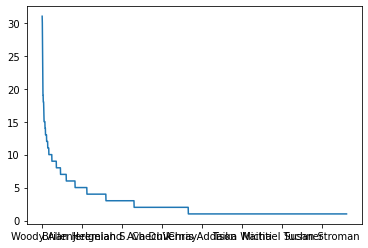

In [25]:
final.director.value_counts().plot()

In [26]:
# final.binned_director_on_total = final.director.apply(lambda x: total_director_counts[x] >= 5)

In [27]:
directors_counts = {}

def is_exp(director):
    count = directors_counts.get(director, 0)
    # update for future uses
    directors_counts[director] = count + 1
    return count > 1
final.loc[:,'binned_director'] = final.director.apply(is_exp)

In [28]:
final.binned_director.value_counts()

False    2818
True     2099
Name: binned_director, dtype: int64

In [29]:
# final.binned_director_on_total.value_counts()

In [30]:
final.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,is_remake,is_sequel,binned_director
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,False,0,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,False,0,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,False,1,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,False,0,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,False,0,False


After talking to Katie, option 2 makes more sense. Since we have a lot of data, we can simply trim off the first 5 years of data at the end to remove any biases

Text(0, 0.5, 'Proportion')

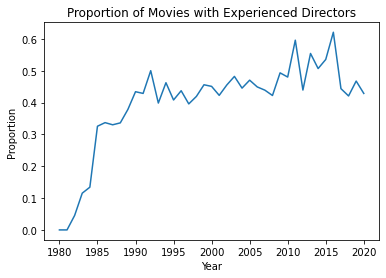

In [31]:
final.groupby("year")['binned_director'].mean().plot()
plt.xlabel("Year")
plt.title("Proportion of Movies with Experienced Directors")
plt.ylabel("Proportion")

## `binned_writers` and `binned_star`

Do the same thing as directors.

In [32]:
person_counts = {}

def is_exp(person):
    count = person_counts.get(person, 0)
    # update for future uses
    person_counts[person] = count + 1
    return count > 1
final['binned_writer'] = final.writer.apply(is_exp)

In [33]:
final.binned_writer.value_counts()

False    3837
True     1080
Name: binned_writer, dtype: int64

Text(0, 0.5, 'Proportion')

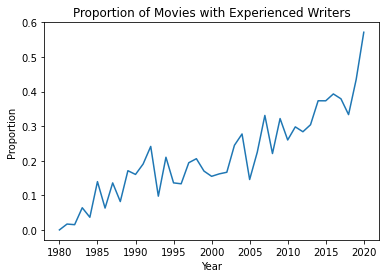

In [34]:
final.groupby("year")['binned_writer'].mean().plot()
plt.xlabel("Year")
plt.title("Proportion of Movies with Experienced Writers")
plt.ylabel("Proportion")

In [35]:
person_counts = {}

def is_exp(person):
    count = person_counts.get(person, 0)
    # update for future uses
    person_counts[person] = count + 1
    return count > 1
final['binned_star'] = final.star.apply(is_exp)

In [36]:
final.binned_star.value_counts()

True     2563
False    2354
Name: binned_star, dtype: int64

Text(0, 0.5, 'Proportion')

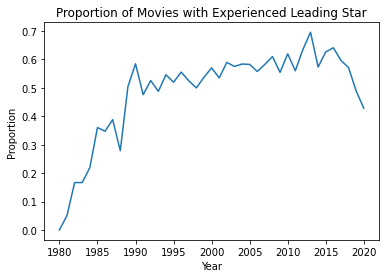

In [37]:
final.groupby("year")['binned_star'].mean().plot()
plt.xlabel("Year")
plt.title("Proportion of Movies with Experienced Leading Star")
plt.ylabel("Proportion")

### genre



In [38]:
final.genre.value_counts()

Comedy       1413
Action       1285
Drama         743
Crime         351
Adventure     298
Biography     279
Animation     238
Horror        236
Fantasy        36
Mystery        14
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [39]:
final.loc[final.genre =='Fantasy', 'genre'] = 'Other'
final.loc[final.genre =='Mystery', 'genre'] = 'Other'
final.loc[final.genre =='Thriller', 'genre'] = 'Other'
final.loc[final.genre =='Sci-Fi', 'genre'] = 'Other'
final.loc[final.genre =='Romance', 'genre'] = 'Other'
final.loc[final.genre =='Family', 'genre'] = 'Other'
final.loc[final.genre =='Western', 'genre'] = 'Other'

In [40]:
final.genre.value_counts().reset_index()

,index,genre
0,Comedy,1413
1,Action,1285
2,Drama,743
3,Crime,351
4,Adventure,298
5,Biography,279
6,Animation,238
7,Horror,236
8,Other,74


## Binning Company

There are a lot of coporate takeovers that I won't try to delve into. Instead, I fixed some common aliases for parent companies and binned based on whether or not the picture was created by the big 5:

"Universal Pictures", "Paramount Pictures", "Warner Bros.", "Columbia Pictures", "Twentieth Century Fox"

In [41]:
final.company.unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Hicktown Entertainment', 'Clubhouse Pictures (II)',
       '20th Century Studios'], dtype=object)

In [42]:
final.loc[final.company.isin([
    'Fox 2000 Pictures', 
    'Fox Searchlight Pictures',
    "Twentieth Century Fox Animation",
    "Fox Atomic",
    "20th Century Studios"
    ]), 'company'] = 'Twentieth Century Fox'

final.loc[final.company.str.contains("Dreamworks", case =False), 'company'] = 'DreamWorks Pictures'

final.loc[final.company.str.contains("Walt Disney"), 'company'] = 'Walt Disney Pictures'
final.loc[final.company.str.contains("Warner Bro"), 'company'] = 'Warner Bros.'

In [43]:
final.company.value_counts().reset_index().style

,index,company
0,Twentieth Century Fox,320
1,Universal Pictures,317
2,Warner Bros.,293
3,Columbia Pictures,284
4,Paramount Pictures,267
5,New Line Cinema,142
6,Walt Disney Pictures,127
7,DreamWorks Pictures,107
8,Touchstone Pictures,103
9,Metro-Goldwyn-Mayer (MGM),95


In [44]:
final['binned_company'] = final.company.isin(["Universal Pictures", "Paramount Pictures", "Warner Bros.",
                                              "Columbia Pictures", "Twentieth Century Fox"])

In [45]:
final.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'is_remake', 'is_sequel', 'binned_director', 'binned_writer',
       'binned_star', 'binned_company'],
      dtype='object')

## Adjusting Gross & Buget by Inflation

In [46]:
inflation

,Unnamed: 0,Year,Tickets sold,Total Box Office,Total Inflation Adjusted Box Office,Average Ticket Price,Number of movies
0,0,2022,813048024,7455652327,7455652402,9.17,24
1,1,2021,492342850,4514785272,4514785378,9.17,60
2,2,2020,216637896,1986571369,1986571369,9.17,76
3,3,2019,1228852682,11256293172,11268579184,9.16,43
4,4,2018,1311294542,11945895805,12024570957,9.11,33
5,5,2017,1225639761,10993991460,11239116609,8.97,25
6,6,2016,1302556379,11267115924,11944442006,8.65,24
7,7,2015,1323267005,11155143861,12134358439,8.43,32
8,8,2014,1257281692,10271994581,11529273126,8.17,43
9,9,2013,1339165241,10887416382,12280145263,8.13,41


In [47]:
inflation['adj_factor'] = inflation['Total Inflation Adjusted Box Office']/inflation['Total Box Office']

<AxesSubplot:xlabel='Year'>

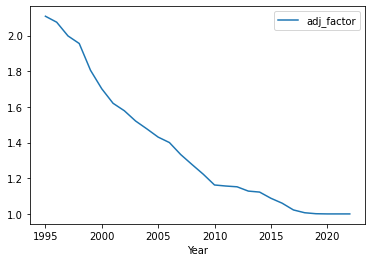

In [48]:
inflation[['Year', 'adj_factor']].plot(x ='Year', y = 'adj_factor')

In [49]:
inflation_adj_factor = inflation[['Year', 'adj_factor']].set_index('Year')['adj_factor'].to_dict()
# add values for 1980-1995: https://www.bls.gov/data/inflation_calculator.htm
inflation_adj_factor.update({
    1980: inflation_adj_factor[1995] * 1.84,
    1981: inflation_adj_factor[1995] * 1.68,
    1982: inflation_adj_factor[1995] * 1.57,
    1983: inflation_adj_factor[1995] * 1.53,
    1984: inflation_adj_factor[1995] * 1.47,
    1985: inflation_adj_factor[1995] * 1.42,
    1986: inflation_adj_factor[1995] * 1.39,
    1987: inflation_adj_factor[1995] * 1.34,
    1988: inflation_adj_factor[1995] * 1.29,
    1989: inflation_adj_factor[1995] * 1.23,
    1990: inflation_adj_factor[1995] * 1.17,
    1991: inflation_adj_factor[1995] * 1.12,
    1992: inflation_adj_factor[1995] * 1.09,
    1993: inflation_adj_factor[1995] * 1.06,
    1994: inflation_adj_factor[1995] * 1.03,
}
)

In [50]:
final['adj_budget'] = final[['year', 'budget']].apply(lambda x: inflation_adj_factor[x[0]]*x[1], axis=1)
final['adj_gross'] = final[['year', 'gross']].apply(lambda x: inflation_adj_factor[x[0]]*x[1], axis=1)

In [51]:
final.tail().style

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,is_remake,is_sequel,binned_director,binned_writer,binned_star,binned_company,adj_budget,adj_gross
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.100000,186000.000000,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.000000,143151000.000000,Universal Pictures,124.000000,0,0,1,1,0,1,7000000.000000,143151000.000000
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.600000,140000.000000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.000000,426505244.000000,Columbia Pictures,124.000000,0,1,0,1,1,1,90000000.000000,426505244.000000
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.500000,102000.000000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.000000,319715683.000000,Paramount Pictures,99.000000,0,0,0,0,0,1,85000000.000000,319715683.000000
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.600000,53000.000000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.000000,245487753.000000,Universal Pictures,101.000000,0,0,1,1,1,1,175000000.000000,245487753.000000
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.800000,42000.000000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.000000,111105497.000000,Twentieth Century Fox,100.000000,0,0,0,0,1,1,135000000.000000,111105497.000000


## Cleaned Data

In [52]:
df = final[['name','rating', 'genre', 'year', 'country', 'runtime', 'is_remake', 'is_sequel',
         'score', 'votes','binned_director', 'binned_writer', 
         'binned_star', 'binned_company', 'adj_budget', 'adj_gross']]

(0.0, 1000.0)

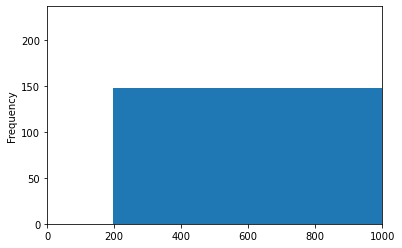

In [53]:
df.votes.plot(kind = 'hist', bins=1000)
plt.xlim(0,1000)

In [54]:
df[df.votes<200]

,name,rating,genre,year,country,runtime,is_remake,is_sequel,score,votes,binned_director,binned_writer,binned_star,binned_company,adj_budget,adj_gross
7616,High on the Hog,R,Action,2019,United States,85.0,False,0,3.5,195.0,False,False,True,False,1.201310e+06,45745.876242


In [55]:
df['ROI'] = (df['adj_gross'] - df['adj_budget'])/df['adj_budget']

C:\Users\ysman\AppData\Local\Temp\ipykernel_6128\2610652305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = (df['adj_gross'] - df['adj_budget'])/df['adj_budget']


In [56]:
df['ROI'].sort_values()

3203       -0.999979
2434       -0.999406
3413       -0.998567
5640       -0.998309
760        -0.998300
            ...     
4471      114.347217
2467      115.708519
6815      428.644100
3459     4142.984983
5114    12889.386667
Name: ROI, Length: 4917, dtype: float64

In [57]:
df.loc[3459,]

name               The Blair Witch Project
rating                                   R
genre                               Horror
year                                  1999
country                      United States
runtime                               81.0
is_remake                            False
is_sequel                                0
score                                  6.5
votes                             239000.0
binned_director                      False
binned_writer                        False
binned_star                          False
binned_company                       False
adj_budget                   108307.067528
adj_gross                 448822861.426903
ROI                            4142.984983
Name: 3459, dtype: object

<AxesSubplot:ylabel='Frequency'>

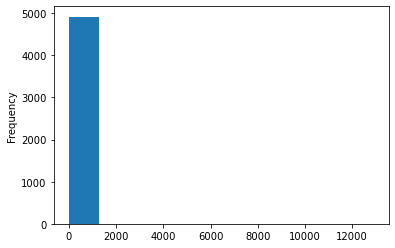

In [58]:
df['ROI'].plot(kind='hist',)

In [59]:
df.to_csv("cleaned_data.csv",index=False)

In [60]:
df

,name,rating,genre,year,country,runtime,is_remake,is_sequel,score,votes,binned_director,binned_writer,binned_star,binned_company,adj_budget,adj_gross,ROI
0,The Shining,R,Drama,1980,United Kingdom,146.0,False,0,8.4,927000.0,False,False,False,True,7.369728e+07,1.822990e+08,1.473620
1,The Blue Lagoon,R,Adventure,1980,United States,104.0,False,0,5.8,65000.0,False,False,False,True,1.745462e+07,2.282797e+08,12.078468
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,United States,124.0,False,1,8.7,1200000.0,False,False,False,False,6.981847e+07,2.088251e+09,28.909726
3,Airplane!,PG,Comedy,1980,United States,88.0,False,0,7.7,221000.0,False,False,False,True,1.357581e+07,3.236999e+08,22.843868
4,Caddyshack,R,Comedy,1980,United States,98.0,False,0,7.3,108000.0,False,False,False,False,2.327282e+07,1.545562e+08,5.641057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,R,Drama,2020,Canada,124.0,False,0,7.1,186000.0,True,True,False,True,7.000000e+06,1.431510e+08,19.450143
7648,Bad Boys for Life,R,Action,2020,United States,124.0,False,1,6.6,140000.0,False,True,True,True,9.000000e+07,4.265052e+08,3.738947
7649,Sonic the Hedgehog,PG,Action,2020,United States,99.0,False,0,6.5,102000.0,False,False,False,True,8.500000e+07,3.197157e+08,2.761361
7650,Dolittle,PG,Adventure,2020,United States,101.0,False,0,5.6,53000.0,True,True,True,True,1.750000e+08,2.454878e+08,0.402787
